### import necessary libraries

In [70]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import albumentations as A

### data 경로
`computer-vision/contests/plant_pathology/data` 폴더 안에 캐글 데이터 다운로드

In [2]:
!pwd

/workspace/computer-vision/contests/plant_pathology


In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [8]:
train_df["path"] = "./data/images/" + train_df["image_id"] + ".jpg"
test_df["path"] = "./data/images/" + test_df["image_id"] + ".jpg"

In [9]:
def get_label(x):
    labels = ["healthy", "multiple_diseases", "rust", "scab"]
    for label in labels:
        if x[label]:
            return label

In [17]:
train_df["label"] = train_df.apply(get_label, axis=1)

In [18]:
train_df["label"].value_counts()

rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: label, dtype: int64

In [27]:
train_df

,image_id,healthy,multiple_diseases,rust,scab,path,label
0,Train_0,0,0,0,1,./data/images/Train_0.jpg,scab
1,Train_1,0,1,0,0,./data/images/Train_1.jpg,multiple_diseases
2,Train_2,1,0,0,0,./data/images/Train_2.jpg,healthy
3,Train_3,0,0,1,0,./data/images/Train_3.jpg,rust
4,Train_4,1,0,0,0,./data/images/Train_4.jpg,healthy
...,...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,./data/images/Train_1816.jpg,scab
1817,Train_1817,1,0,0,0,./data/images/Train_1817.jpg,healthy
1818,Train_1818,1,0,0,0,./data/images/Train_1818.jpg,healthy
1819,Train_1819,0,0,1,0,./data/images/Train_1819.jpg,rust


### 이미지 데이터 시각화

In [96]:
def show_images(img_path_list, ncols=6, title=None, augmentor=None):
    fig, axs = plt.subplots(figsize=(20, 20), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        img = cv2.cvtColor(cv2.imread(img_path_list[i+23]), cv2.COLOR_BGR2RGB)
        if augmentor:
            img = augmentor(image=img)['image']
        axs[i].imshow(img)
        axs[i].set_title(title)

In [97]:
rust_img_list = list(train_df[train_df["rust"] == 1]["path"])
scab_img_list = list(train_df[train_df["scab"] == 1]["path"])
healthy_img_list = list(train_df[train_df["healthy"] == 1]["path"])
multiple_diseases_img_list = list(train_df[train_df["multiple_diseases"] == 1]["path"])

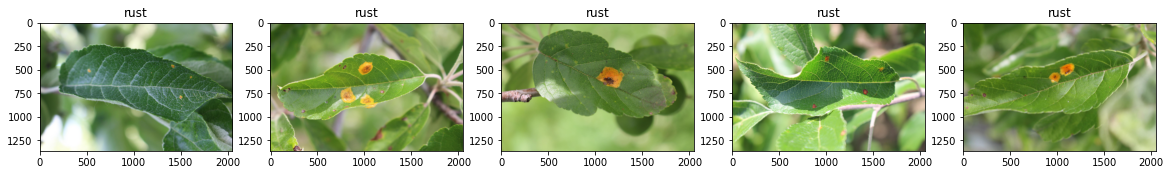

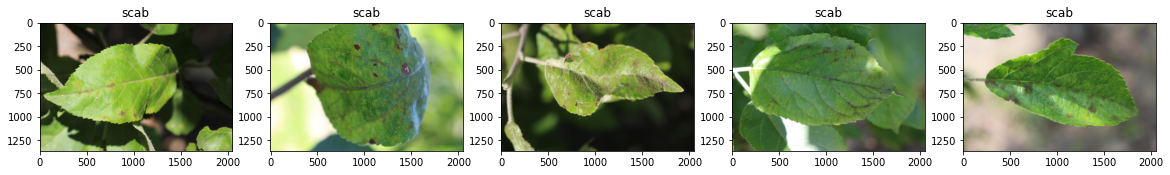

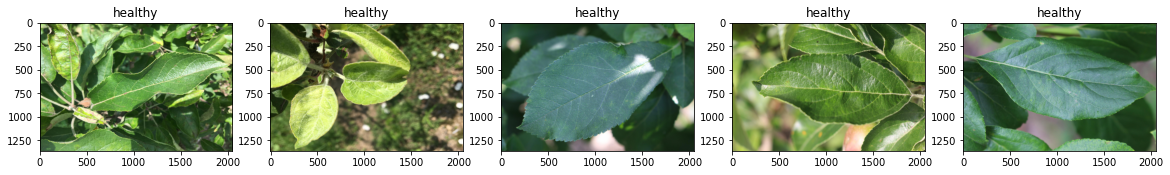

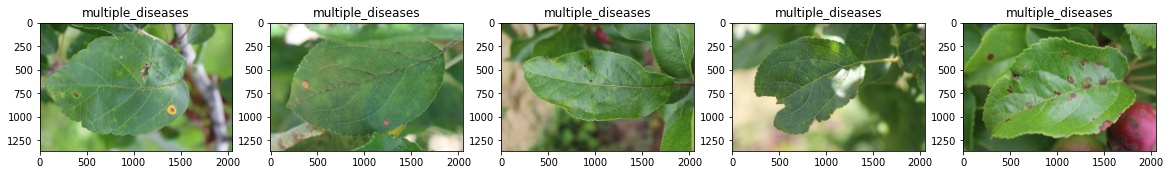

In [73]:
show_images(rust_img_list, title="rust")
show_images(scab_img_list, title="scab")
show_images(healthy_img_list, title="healthy")
show_images(multiple_diseases_img_list, title="multiple_diseases")

### augmentation

In [101]:
aug_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=45, always_apply=True),
    
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), rotate_limit=30, p=1),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.CenterCrop(height=1365, width=1365, p=1.0)
])

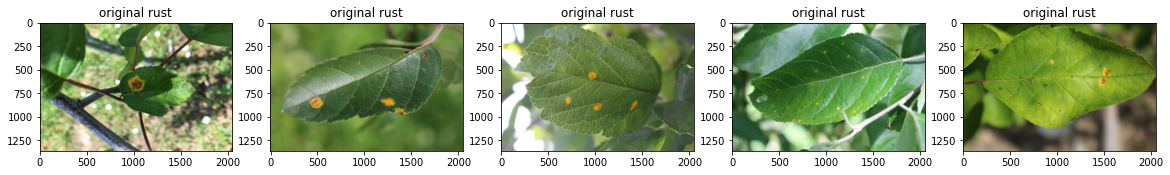

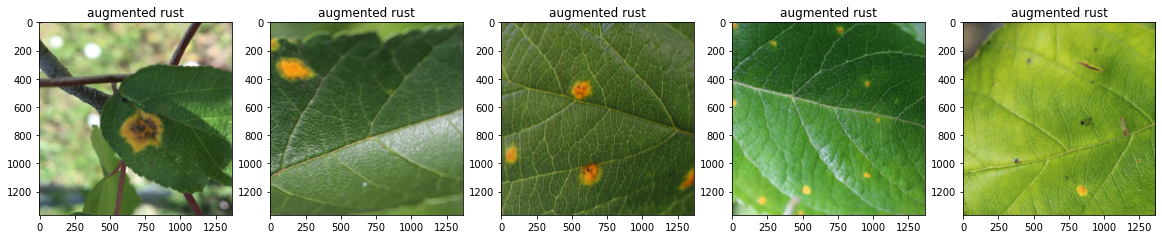

In [102]:
show_images(rust_img_list, ncols=5, title='original rust', augmentor=None)
show_images(rust_img_list, ncols=5, title='augmented rust', augmentor=aug_01)